# Template Pipeline
Normalisation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**-**  
Imputation 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Outlier Detection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Z Score**  
Imputation 2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Feature Selection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Implicit to model**  
Model&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Lasso Regression**


## Imports

In [ ]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression, Lasso, BayesianRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Custom
import sys,os
sys.path.append('/home/jovyan/work/AML/Task_1/Solution') # I would like a cleaner solution but works for now
import Components.Imputation as Imputation
import Components.Outlier_Detection_1D as Outlier_Detection_1D
import Components.Outlier_Detection_ND as Outlier_Detection_ND
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Imputation)
importlib.reload(Outlier_Detection_1D)
importlib.reload(Outlier_Detection_ND)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)

<module 'Components.data_fetching' from '/home/jovyan/work/AML/Task_1/Solution/Components/data_fetching.py'>

## Data Cleaning

In [ ]:
X, y = data_fetching.get_train_data()

print("Missing values before simple median imputation: ")
print(X.isnull().sum().sum())
missing_values = Imputation.missing_values_mask(X)
X = Imputation.median(X)

print("Missing values after simple median imputation: ")
print(X.isnull().sum().sum())

X = Outlier_Detection_1D.z_score(X)
y = Outlier_Detection_1D.z_score(y)

print("Missing values after outlier detection: ")
print(X.isnull().sum().sum())
print(y.isnull().sum().sum())


X = X.mask(missing_values)
print("Missing values after applying the missing value mask: ")
print(X.isnull().sum().sum())

X = Imputation.iterative_regression(X)
y = Imputation.iterative_regression(y)

print("Missing values after second round of imputation: ")
print(X.isnull().sum().sum())
print(y.isnull().sum().sum())


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

Missing values before simple median imputation: 
76910
Missing values after simple median imputation: 
0
Missing values after outlier detection: 
2750
0
Missing values after applying the missing value mask: 
79660


KeyboardInterrupt: 

In [ ]:
print("Missing values after second round of imputation (this time knn): ")
X = Imputation.knn(X)

print(X.isnull().sum().sum())



## Model Training

### Simple

In [ ]:
x_test, x_test_index = data_fetching.get_test_data()
print(x_test.head())
print(x_test_index)

          x0             x1            x2           x3            x4  \
0   9.101943  832442.839400  20585.538590          NaN  1.005104e+06   
1  11.722077  832442.826314  20585.509289  1039.097880  9.836399e+05   
2  11.200277  832442.820359  20585.511136  1081.926822  1.059913e+06   
3   9.668873  832442.820901  20585.528528  1063.771791  1.023284e+06   
4  10.329962  832442.871842  20585.483009  1013.321073  9.396156e+05   

          x5             x6            x7            x8             x9  ...  \
0  10.417525  597900.393691  10791.058148  9.829612e+05  785176.180458  ...   
1  11.185000  597900.474419  10321.030961  9.998527e+05  785176.200371  ...   
2        NaN  597900.432849   9394.048739  8.439144e+05  785176.185410  ...   
3   9.635705  597900.426803  10640.030819  1.018818e+06  785176.263405  ...   
4  10.664417  597900.399834  10464.062039  1.024615e+06  785176.251995  ...   

           x822         x823          x824       x825       x826         x827  \
0  1.049199

In [ ]:
lasso = Lasso(normalize=False, max_iter=1000, alpha=15000).fit(x_train, y_train)

print('Train Score:')
y_pred_train = lasso.predict(x_train)
train_score = r2_score(y_train, y_pred_train)
print(train_score)

print('Test Score')
y_pred_test = lasso.predict(x_test)
test_score = r2_score(y_test, y_pred_test)
print(test_score)

Train Score:
0.338279710399328
Test Score
0.32895419200454534
/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35232.84337978566, tolerance: 10.00594456310679
  positive)


In [ ]:
print('hello')

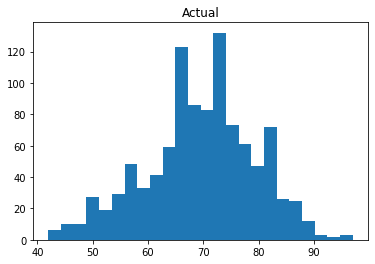

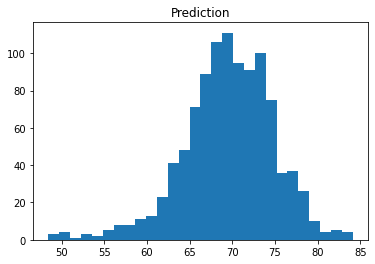

In [ ]:
plt.hist(y_train.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_train, bins='auto')
plt.title('Prediction')
plt.show()

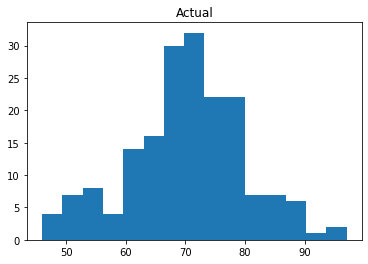

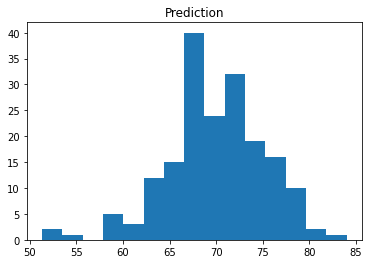

In [ ]:
plt.hist(y_test.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_test, bins='auto')
plt.title('Prediction')
plt.show()

### With Cross Validation

In [ ]:
scores = cross_val_score(lasso, x_train, y_train, cv=5, scoring='r2')
print(scores)

[0.33658763 0.20913709 0.35286253 0.26966261 0.26177417]


## Final Prediction

/opt/venv/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35232.84337978566, tolerance: 10.00594456310679
  positive)


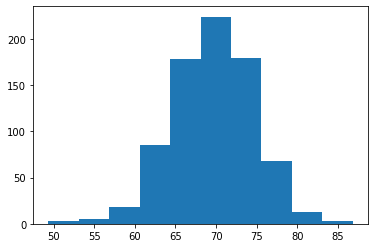

In [ ]:
lasso_final = Lasso(normalize=False, max_iter=1000, alpha=15000).fit(x_train, y_train)
x_test = data_fetching.get_test_data()
x_test = Imputation.mean(x_test)
# Note: They said no outliers were introduced in x_test so no need to perform outlier detection
y_pred = lasso_final.predict(x_test)
plt.hist(y_pred)

y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
y_pred_pd.to_csv('../../Predictions/template.csv', index_label='Id')